<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

# House Price Prediction | Kaggle Competition

# Hamda Hmida ®

## SETUP

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## DATA Loading

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.shape

(1459, 80)

In [7]:
train['target']=np.log(train.SalePrice)

## DATA Preprocessing and Cleaning

<AxesSubplot:>

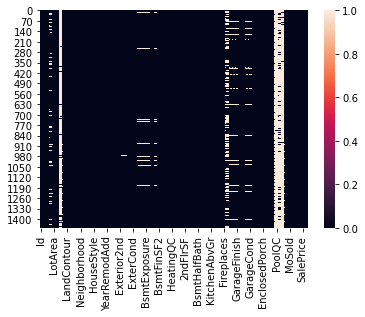

In [8]:
sns.heatmap(train.isnull())

In [9]:
quan = list( test.loc[:,test.dtypes != 'object'].drop('Id',axis=1).columns.values )
qual = list( test.loc[:,test.dtypes == 'object'].columns.values )

In [10]:
for i in quan :
    print(i,train[i].isnull().sum())

MSSubClass 0
LotFrontage 259
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 8
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 81
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0


In [11]:
for i in quan :
    if train[i].isnull().sum() != 0 :
        print(i,train[i].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [12]:
# NAN should mean no garage and no MasVnrArea.  
train.GarageYrBlt.fillna(0, inplace=True)
train.MasVnrArea.fillna(0, inplace=True)

# remplace NAN with the median
train.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)

In [13]:
for i in qual :
    print(i,train[i].isnull().sum())

MSZoning 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
KitchenQual 0
Functional 0
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PavedDrive 0
PoolQC 1453
Fence 1179
MiscFeature 1406
SaleType 0
SaleCondition 0


In [14]:
for i in qual :
    if train[i].isnull().sum() != 0 :
        print(i,train[i].isnull().sum())

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [15]:
# Now the qualitative features
train.Alley.fillna('NA', inplace=True)
train.MasVnrType.fillna('None', inplace=True)
train.BsmtCond.fillna('NA', inplace=True)        
train.BsmtQual.fillna('NA', inplace=True)
train.BsmtExposure.fillna('NA', inplace=True)           
train.BsmtFinType2.fillna('NA', inplace=True)     
train.BsmtFinType1.fillna('NA', inplace=True) 
train.FireplaceQu.fillna('NA', inplace=True)
train.GarageCond.fillna('NA', inplace=True)    
train.GarageQual.fillna('NA', inplace=True)     
train.GarageFinish.fillna('NA', inplace=True)   
train.GarageType.fillna('NA', inplace=True)     
train.PoolQC.fillna('NA', inplace=True)
train.MiscFeature.fillna('NA', inplace=True)    
train.Fence.fillna('NA', inplace=True) 

In [16]:
train.Electrical.fillna(train.Electrical.mode()[0], inplace=True)

In [17]:
for i in qual :
    if train[i].isnull().sum() != 0 :
        print(i,train[i].isnull().sum())

In [18]:
#transforme the importants features
train.Alley = train.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
train.BsmtCond =  train.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.BsmtExposure = train.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train['BsmtFinType1'] = train['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['BsmtFinType2'] = train['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train.BsmtQual = train.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.ExterCond = train.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.ExterQual = train.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.FireplaceQu = train.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.Functional = train.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
train.GarageCond = train.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.GarageQual = train.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.HeatingQC = train.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.KitchenQual = train.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train.LandSlope = train.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
train.PavedDrive = train.PavedDrive.map({'N':1, 'P':2, 'Y':3})
train.PoolQC = train.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train.Street = train.Street.map({'Grvl':1, 'Pave':2})
train.Utilities = train.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

In [19]:
newquan = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
quan = quan + newquan 
for i in newquan: qual.remove(i)

In [20]:
train['Age'] = train.YrSold - train.YearBuilt
train['AgeRemod'] = train.YrSold - train.YearRemodAdd
train['AgeGarage'] = train.YrSold - train.GarageYrBlt

In [21]:
# For the houses without a Garage,NANs means zeros, which makes AgeGarage ~ 2000
# so I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(train.AgeGarage[train.AgeGarage < 1000])
train['AgeGarage'] = train['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

In [22]:
# Some of the values are negative because the work was done after the house 
# was sold. In these cases, I change them to zero to avoid negative ages.
train.Age = train.Age.map(lambda x: 0 if x < 0 else x)
train.AgeRemod = train.AgeRemod.map(lambda x: 0 if x < 0 else x)
train.AgeGarage = train.AgeGarage.map(lambda x: 0 if x < 0 else x)

In [23]:
quan = quan + ['Age','AgeRemod','AgeGarage']

## DATA Visualization

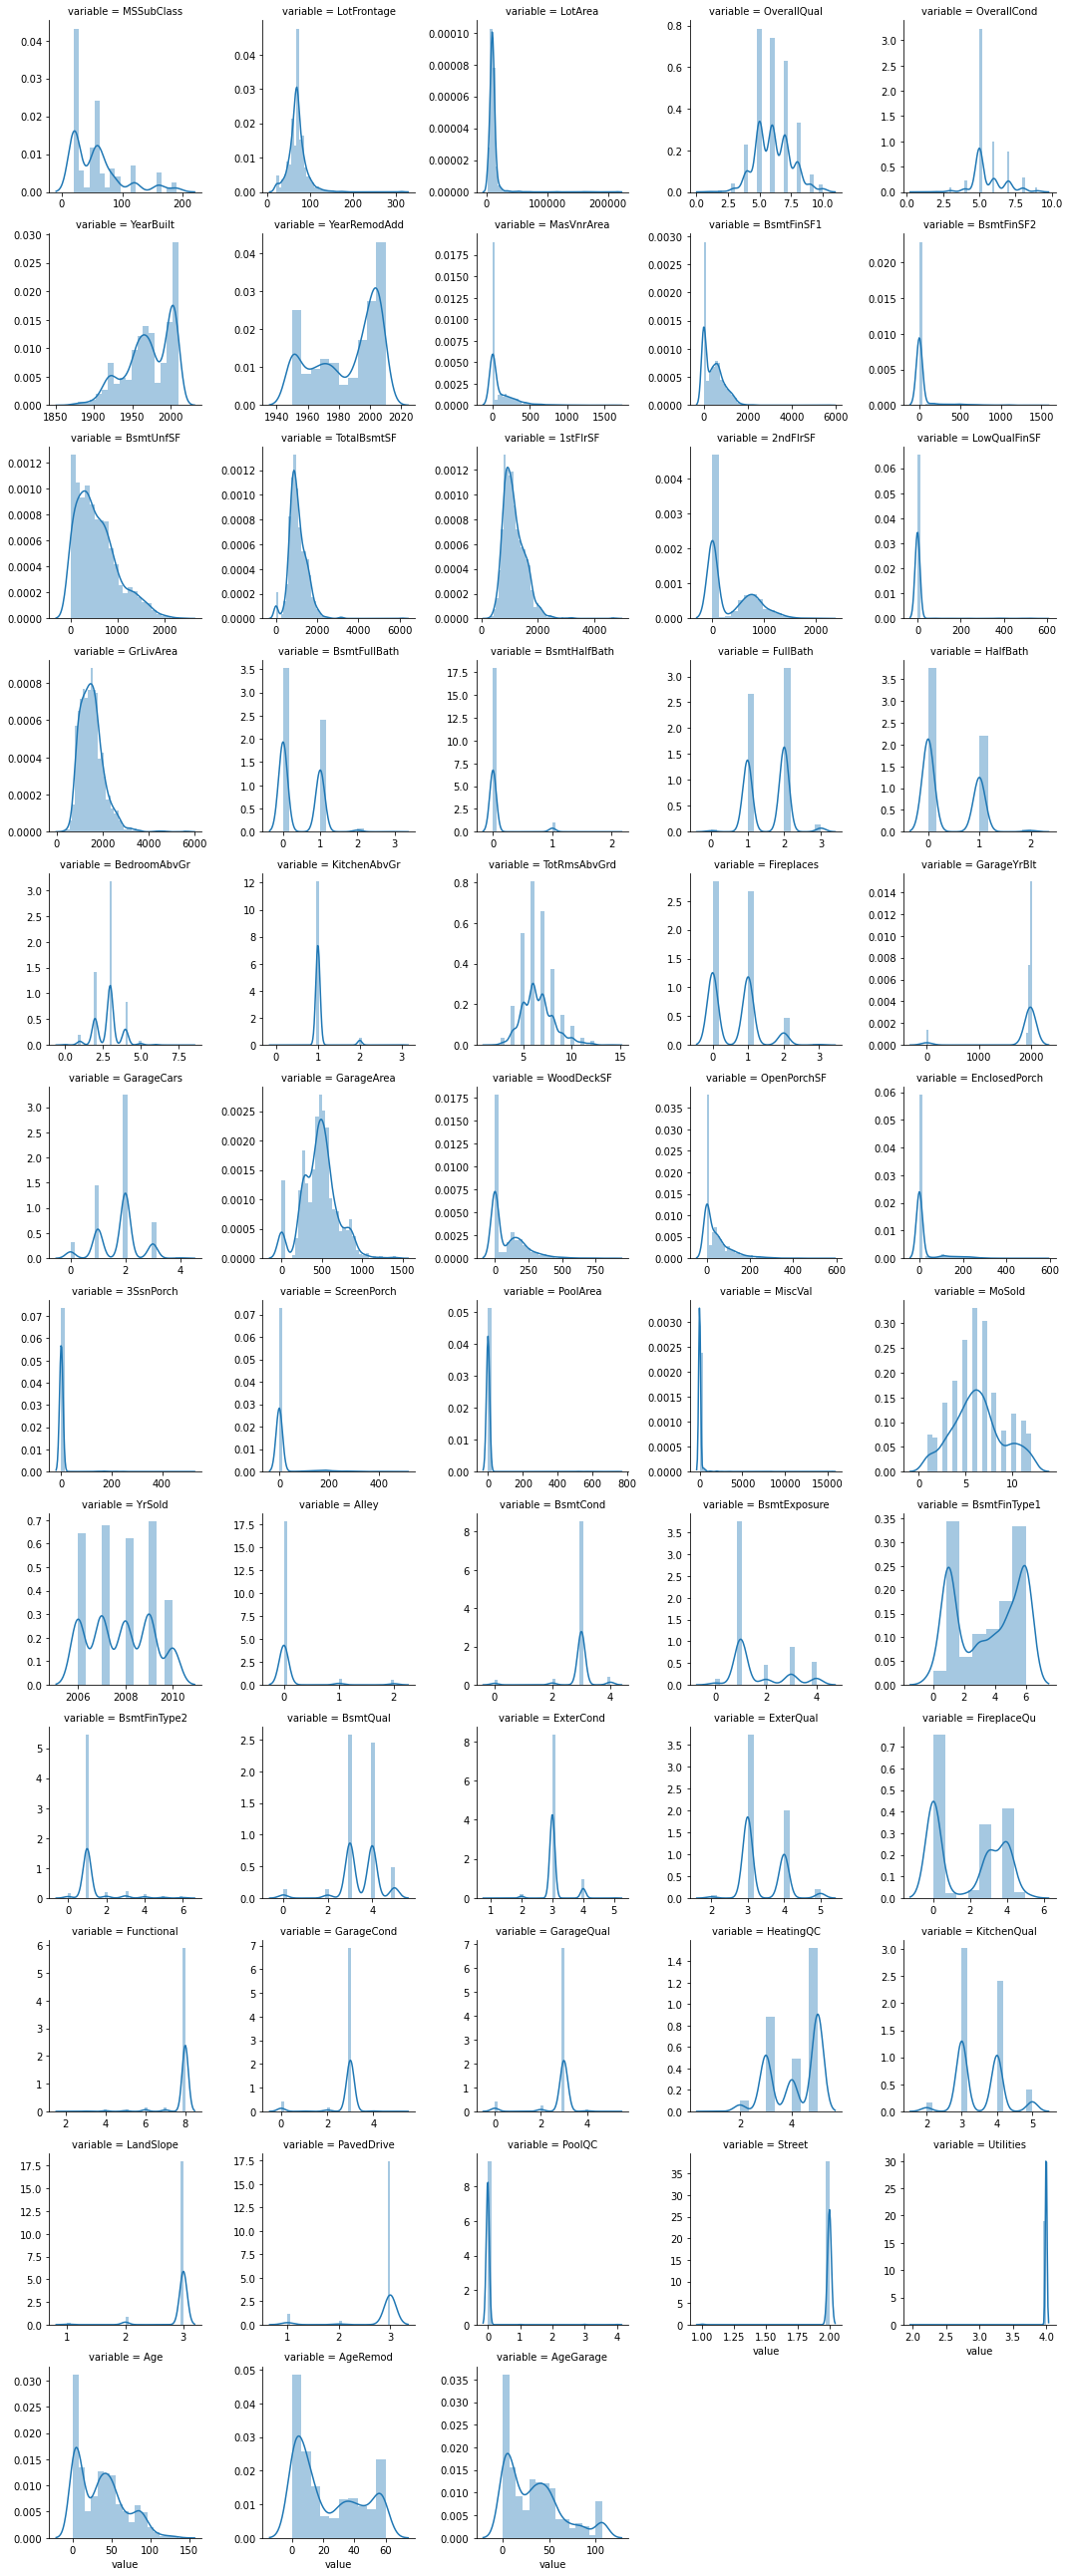

In [24]:
temp = pd.melt(train.drop('SalePrice',axis=1), value_vars=quan)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5 , size=3.0, 
                     aspect=1.0,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

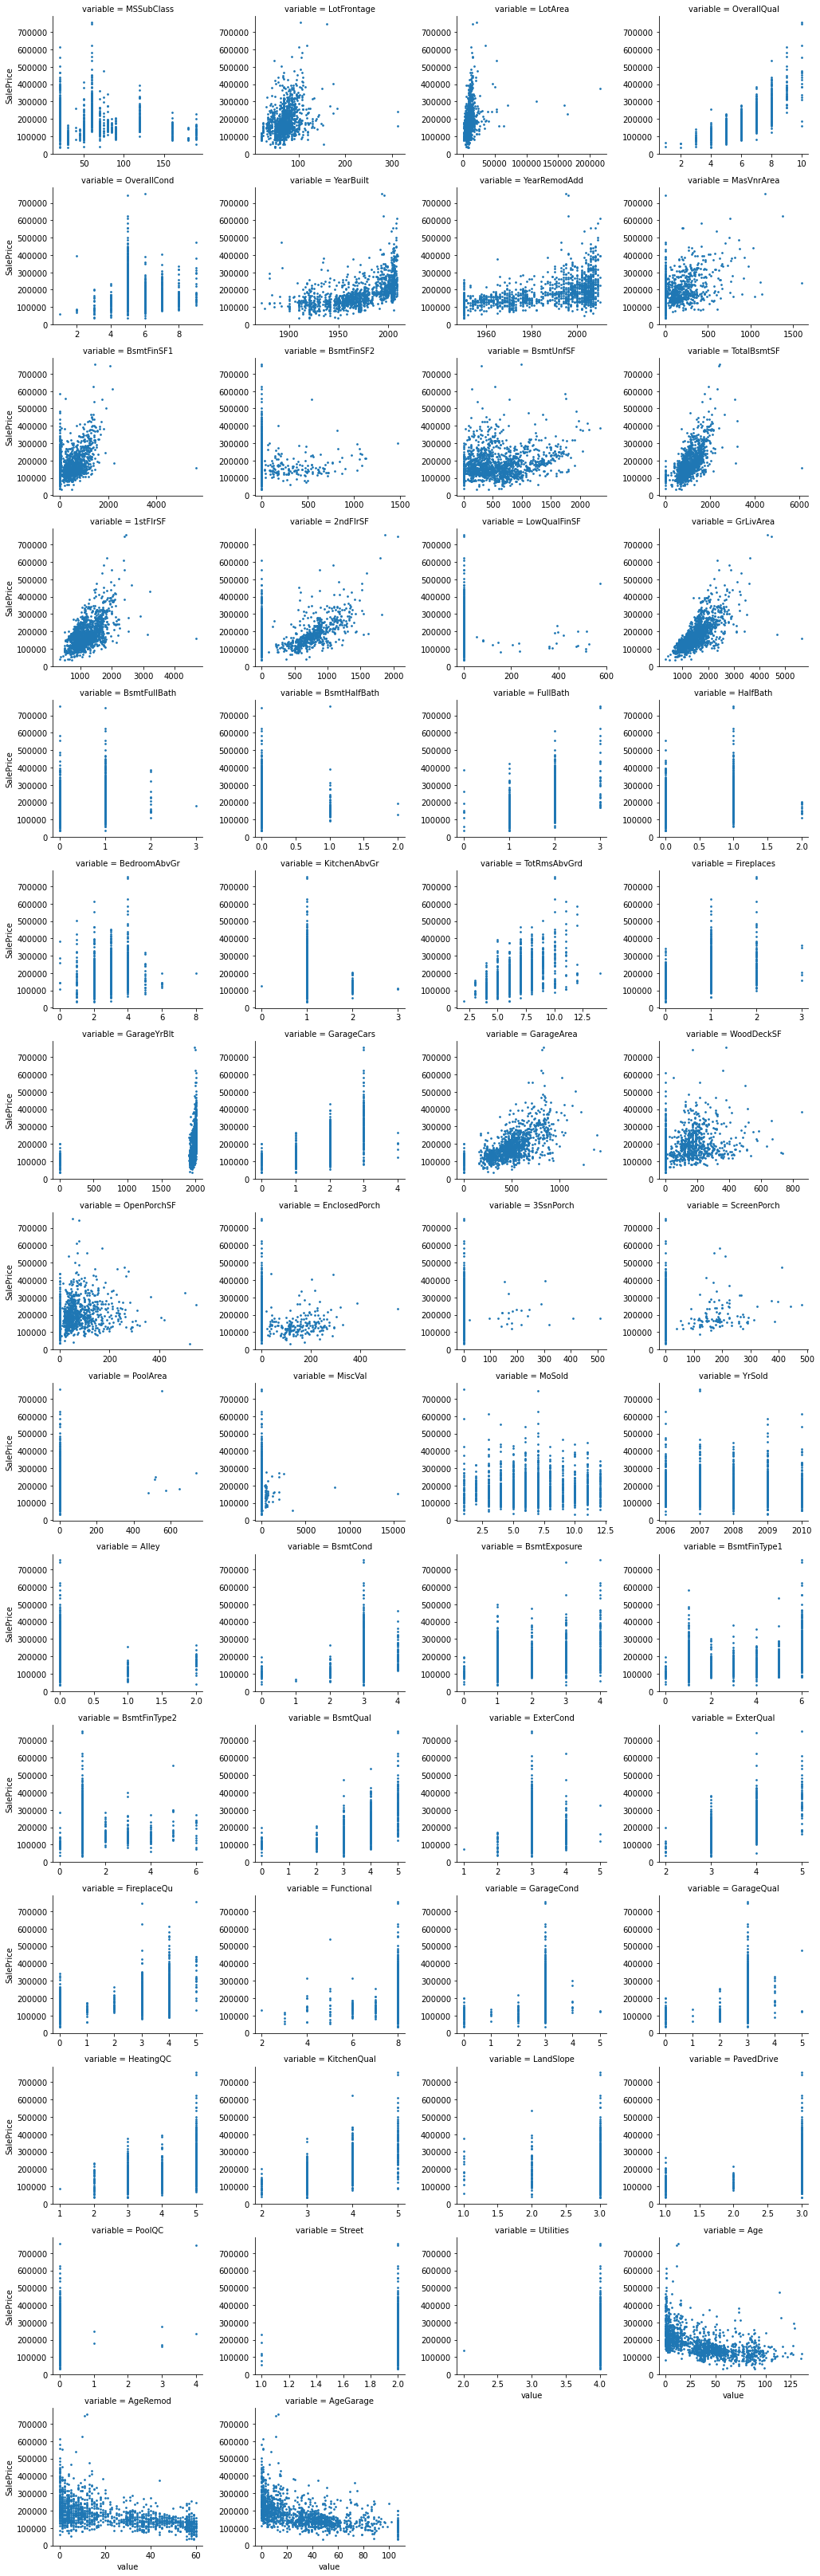

In [25]:
temp = pd.melt(train, id_vars=['SalePrice'],value_vars=quan)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=4 , size=3.0, 
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'SalePrice', s=3)
plt.show()

## Cleaning the test data set

<AxesSubplot:>

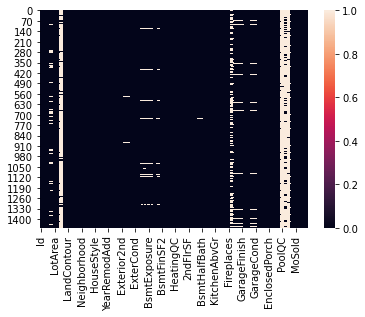

In [26]:
sns.heatmap(test.isnull())

In [27]:
columns=test.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [28]:
for i in columns :
    if test[i].isnull().sum() != 0 and i in quan :
        print(i,test[i].isnull().sum())

LotFrontage 227
Alley 1352
Utilities 2
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageYrBlt 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456


In [29]:
test.GarageYrBlt.fillna(0, inplace=True)
test.MasVnrArea.fillna(0, inplace=True)
test.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)
test.Alley.fillna('NA', inplace=True)
test.MasVnrType.fillna('None', inplace=True)
test.BsmtCond.fillna('NA', inplace=True)        
test.BsmtQual.fillna('NA', inplace=True)
test.BsmtExposure.fillna('NA', inplace=True)           
test.BsmtFinType2.fillna('NA', inplace=True)     
test.BsmtFinType1.fillna('NA', inplace=True) 
test.FireplaceQu.fillna('NA', inplace=True)
test.GarageCond.fillna('NA', inplace=True)    
test.GarageQual.fillna('NA', inplace=True)     
test.GarageFinish.fillna('NA', inplace=True)   
test.GarageType.fillna('NA', inplace=True)     
test.PoolQC.fillna('NA', inplace=True)
test.MiscFeature.fillna('NA', inplace=True)    
test.Fence.fillna('NA', inplace=True) 
test.Electrical.fillna(test.Electrical.mode()[0], inplace=True)
test.Functional.fillna(test.Functional.mode()[0], inplace=True)       
test.Utilities.fillna(test.Utilities.mode()[0], inplace=True)          
test.Exterior1st.fillna(test.Exterior1st.mode()[0], inplace=True)        
test.SaleType.fillna(test.SaleType.mode()[0], inplace=True)                
test.KitchenQual.fillna(test.KitchenQual.mode()[0], inplace=True)        
test.MSZoning.fillna(test.MSZoning.mode()[0], inplace=True)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mode()[0], inplace=True)
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mode()[0], inplace=True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mode()[0], inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mode()[0], inplace=True)
test.BsmtFullBath.fillna(test.BsmtFullBath.mode()[0], inplace=True)
test.BsmtHalfBath.fillna(test.BsmtHalfBath.mode()[0], inplace=True)
test.GarageCars.fillna(test.GarageCars.mode()[0], inplace=True)
test.GarageArea.fillna(test.GarageArea.mode()[0], inplace=True)

In [30]:
test.Alley = test.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
test.BsmtCond =  test.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.BsmtExposure = test.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test['BsmtFinType1'] = test['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['BsmtFinType2'] = test['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test.BsmtQual = test.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.ExterCond = test.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.ExterQual = test.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.FireplaceQu = test.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.Functional = test.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
test.GarageCond = test.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.GarageQual = test.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.HeatingQC = test.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.KitchenQual = test.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test.LandSlope = test.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
test.PavedDrive = test.PavedDrive.map({'N':1, 'P':2, 'Y':3})
test.PoolQC = test.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test.Street = test.Street.map({'Grvl':1, 'Pave':2})
test.Utilities = test.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

In [31]:
test['Age'] = test.YrSold - test.YearBuilt
test['AgeRemod'] = test.YrSold - test.YearRemodAdd
test['AgeGarage'] = test.YrSold - test.GarageYrBlt

In [32]:
max_AgeGarage = np.max(test.AgeGarage[test.AgeGarage < 1000])
test['AgeGarage'] = test['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

In [33]:
test.Age = test.Age.map(lambda x: 0 if x < 0 else x)
test.AgeRemod = test.AgeRemod.map(lambda x: 0 if x < 0 else x)
test.AgeGarage = test.AgeGarage.map(lambda x: 0 if x < 0 else x)

### Modelling

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = train[quan]
y = train.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from xgboost import XGBRegressor

In [37]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)

print(imp)

               Importance
GarageCars       0.362775
GarageCond       0.145958
KitchenQual      0.110848
FireplaceQu      0.075858
OverallQual      0.062089
GrLivArea        0.031079
TotalBsmtSF      0.022402
BsmtFinType1     0.021411
BsmtQual         0.016917
Functional       0.012071
YearRemodAdd     0.010612
BsmtFinSF1       0.008062
Street           0.007076
Age              0.006886
BsmtExposure     0.006863
KitchenAbvGr     0.005888
OverallCond      0.005562
1stFlrSF         0.005478
FullBath         0.005137
BsmtFinType2     0.005121
LotArea          0.004842
GarageQual       0.004135
ExterQual        0.003967
ExterCond        0.003301
Alley            0.003038
GarageYrBlt      0.002914
BedroomAbvGr     0.002880
OpenPorchSF      0.002842
BsmtCond         0.002798
PoolQC           0.002653
BsmtFullBath     0.002516
AgeRemod         0.002492
ScreenPorch      0.002349
BsmtHalfBath     0.002288
HalfBath         0.002283
BsmtFinSF2       0.002127
PavedDrive       0.002016
MoSold      

In [38]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

In [39]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

# Define a function to calculate negative RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

neg_rmse = make_scorer(nrmse)

estimator = XGBRegressor()
selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring = neg_rmse)
selector = selector.fit(X_train, y_train)

print("The number of selected features is: {}".format(selector.n_features_))

features_kept = X_train.columns.values[selector.support_] 
X_train = X_train[features_kept]
X_test = X_test[features_kept]

The number of selected features is: 27


In [40]:
features_kept

array(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'OpenPorchSF', 'Alley', 'BsmtExposure',
       'BsmtFinType1', 'BsmtQual', 'ExterCond', 'FireplaceQu',
       'Functional', 'GarageQual', 'KitchenQual', 'Street', 'Age',
       'AgeRemod'], dtype=object)

In [41]:
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [42]:
ridge = KernelRidge()

parameters = {'alpha': uniform(0.05, 1.0), 'kernel': ['polynomial'], 
              'degree': [2], 'coef0':uniform(0.5, 3.5)}

random_search = RandomizedSearchCV(estimator = ridge,
                                   param_distributions = parameters,
                                   n_iter = 1000,
                                   cv = 3,
                                   scoring = neg_rmse,
                                   n_jobs = -1,
                                   random_state=0)

random_search = random_search.fit(X_train, y_train)

print("Parameters of the best_estimator:")
print(random_search.best_params_)
print("Mean cross-validated RMSE of the best_estimator: {}".format(-random_search.best_score_))
model = random_search.best_estimator_
print("RMSE of the whole training set: {}".format(rmse(y_train, model.predict(X_train))))

Parameters of the best_estimator:
{'alpha': 0.05788410350844038, 'coef0': 1.8043767443734844, 'degree': 2, 'kernel': 'polynomial'}
Mean cross-validated RMSE of the best_estimator: 0.2327243199997956
RMSE of the whole training set: 0.1063000096052482


In [43]:
y_pred = np.exp(model.predict(test[features_kept]))
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
output.to_csv('prediction.csv', index=False)